<a href="https://colab.research.google.com/github/viperact/pythondemo/blob/main/python_19_naver_movie_review_wordcloud_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 워드클라우드와 텍스트 마이닝

### colab 한글화
설치 후 메뉴 런타임 -> 런타임 다시 시작

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,888 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


### JPype 설치
- http://kkma.snu.ac.kr/documents/index.jsp?doc=postag 한글 형태소 품사 (Part Of Speech, POS) 태그표
- python에서 java 라이브러리를 이용할 수 있도록 설치한다.

In [2]:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
# 아래 부분 바로 실행하면 jpype 설치됨
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 30.8 MB/s 


In [3]:
# 한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 642 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 기본
import numpy as np # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

# 데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
!pip list

### 데이터 가져오기

In [5]:
df = pd.read_csv('data_crowling/movie_reviews.csv')
df.head()

,Unnamed: 0,title,story,genre,genre_code
0,0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,['액션'],[8]
1,1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"['공연실황', '다큐멘터리']","[5, 3]"
2,2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"['애니메이션', '코미디', '가족']","[1, 9, 14]"
3,3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,['다큐멘터리'],[3]
4,4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"['다큐멘터리', '드라마']","[3, 13]"


In [6]:
df.shape

(50, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   title       50 non-null     object
 2   story       50 non-null     object
 3   genre       50 non-null     object
 4   genre_code  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


### 명사단어 추출

### 1. 세종사전 실행

In [8]:
from konlpy.tag import Okt
twitter = Okt()

### 2. 단어 리스트 만들기

In [9]:
word_list = []
word_list = df['story']

In [10]:
word_list

0     최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...
1     언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...
2     편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...
3     아흔 셋 나의 사랑하는 할머니가 자살을 시도했다  취업준비를 하며 보내던 어느 날 ...
4     잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프  친...
5     1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...
6     나를 세상에 태어나게 한 부모님을 고소하고 싶어요출생기록조차 없이 살아온 어쩌면 1...
7     귀여운 소년 이든의 단짝 반려견 베일리는 행복한 생을 마감한다하지만 눈을 떠보니 다...
8     누구보다 위트 있고 호기심 많은 매력 부자 어기제이콥 트렘블레이 하지만 남들과 다른...
9     1950년 한국전쟁에 파병된 슐레이만은 칠흑 같은 어둠 속 홀로 남겨진 5살 소녀를...
10    컴퓨터 모니터를 통해 세상 밖으로 나온 의문의 알타이치와 히카리 남매 앞에 디지몬과...
11    친애하는 길베르트 소령님오늘도 또 당신을 떠올리고 말았습니다 무엇을 보든 무엇을 하...
12    전직 레슬링 선수였던 마하비르 싱 포갓아미르 칸은 아버지의 반대로 금메달의 꿈을 이...
13    가까운 미래 지구는 에너지 고갈 문제를 해결하기 위해 머나먼 행성 판도라에서 대체 ...
14    2007년 춘절 귀향하는 기차에서 처음 만나 친구가 된 린젠칭정백연과 팡샤오샤오주동...
15    1960년대 매출 감소에 빠진 포드는 판매 활로를 찾기 위해스포츠카 레이스를 장악한...
16    일본의 인종차별 문제를 다룬 영상을 올린 후 우익들의 공격 대상이 된 일본계 미국인...
17    촉망 받던 은행 부지점장 앤디팀 로빈슨 分는 아내와 그 애인을 살해한 혐의로

### 3. 형태소 분리 및 품사태깅

In [11]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('인피니티', 'Noun'), ('워', 'Noun'), ('이후', 'Noun'), ('절반', 'Noun'), ('만', 'Josa'), ('살아남은', 'Verb'), ('지구', 'Noun'), ('\xa0', 'Foreign'), ('마지막', 'Noun'), ('희망이', 'Noun'), ('된', 'Verb'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('먼저', 'Noun'), ('떠난', 'Verb'), ('그', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위해', 'Noun'), ('모든', 'Noun'), ('것', 'Noun'), ('을', 'Josa'), ('걸었다', 'Verb'), ('\xa0\xa0', 'Foreign'), ('위대한', 'Adjective'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('운명', 'Noun'), ('을', 'Josa'), ('바꿀', 'Verb'), ('최후', 'Noun'), ('의', 'Josa'), ('전쟁', 'Noun'), ('이', 'Josa'), ('펼쳐진다', 'Verb')]


### 4. 명사만 추출

In [12]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [13]:
noun_list

['최고',
 '파일럿',
 '이자',
 '전설',
 '인물',
 '매버릭톰',
 '크루즈',
 '은',
 '자신',
 '졸업',
 '훈련',
 '학교',
 '교관',
 '발탁',
 '다그',
 '명성',
 '팀원',
 '매버릭',
 '지시',
 '무시',
 '실전',
 '방불',
 '케',
 '상공',
 '훈련',
 '눈',
 '전설',
 '조종',
 '실력',
 '모두',
 '압도',
 '버릭',
 '지휘',
 '아래',
 '팀워크',
 '팀원',
 '국경',
 '임무',
 '자매',
 '버릭',
 '자신',
 '동료',
 '마지막',
 '하늘',
 '위',
 '비행',
 '화면',
 '정',
 '중앙',
 '스포트라이트',
 '몸',
 '스타',
 '트바',
 '로티',
 '김호중',
 '그',
 '틀',
 '바깥',
 '구석',
 '지고',
 '어',
 '두운',
 '불구',
 '또',
 '다른',
 '이야기',
 '김호중',
 '두',
 '극장',
 '영화',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '틀',
 '바깥',
 '이야기',
 '사람',
 '시선',
 '보이지',
 '청년',
 '김호중',
 '이야기',
 '그것',
 '가수',
 '김호중',
 '목소리',
 '전',
 '공연',
 '실황',
 '다큐멘터리',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '오직',
 '이',
 '영화',
 '위해',
 '무대',
 '김호중',
 '단독',
 '공연',
 '최초',
 '공개',
 '트로트',
 '가수',
 '김호중',
 '고정관념',
 '처음',
 '음악',
 '대한',
 '열정',
 '해',
 '준',
 '클래식',
 '음악',
 '구성',
 '그',
 '웅장',
 '목소리',
 '감상',
 '수',
 '여기',
 '꿈',
 '스무',
 '살',
 '음악',
 '대한',
 '동경',
 '이탈리아',
 '다시',
 '김호중',
 '다큐',
 '여행기',
 '버스킹',
 '공연',
 '모두',
 '김호중',
 '그동안',
 

### 5. 명사가 두 문자 이상인 요소만 추출

In [14]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['최고',
 '파일럿',
 '이자',
 '전설',
 '인물',
 '매버릭톰',
 '크루즈',
 '자신',
 '졸업',
 '훈련',
 '학교',
 '교관',
 '발탁',
 '다그',
 '명성',
 '팀원',
 '매버릭',
 '지시',
 '무시',
 '실전',
 '방불',
 '상공',
 '훈련',
 '전설',
 '조종',
 '실력',
 '모두',
 '압도',
 '버릭',
 '지휘',
 '아래',
 '팀워크',
 '팀원',
 '국경',
 '임무',
 '자매',
 '버릭',
 '자신',
 '동료',
 '마지막',
 '하늘',
 '비행',
 '화면',
 '중앙',
 '스포트라이트',
 '스타',
 '트바',
 '로티',
 '김호중',
 '바깥',
 '구석',
 '지고',
 '두운',
 '불구',
 '다른',
 '이야기',
 '김호중',
 '극장',
 '영화',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '바깥',
 '이야기',
 '사람',
 '시선',
 '보이지',
 '청년',
 '김호중',
 '이야기',
 '그것',
 '가수',
 '김호중',
 '목소리',
 '공연',
 '실황',
 '다큐멘터리',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '오직',
 '영화',
 '위해',
 '무대',
 '김호중',
 '단독',
 '공연',
 '최초',
 '공개',
 '트로트',
 '가수',
 '김호중',
 '고정관념',
 '처음',
 '음악',
 '대한',
 '열정',
 '클래식']

### 6. 단어 카운트

In [15]:
counts = Counter(noun_list)
tags = counts.most_common(30) # 30개만 가져옴
print(len(tags))
tags

30


[('자신', 29),
 ('위해', 26),
 ('시작', 24),
 ('사랑', 21),
 ('사람', 19),
 ('김호중', 15),
 ('이야기', 15),
 ('인생', 13),
 ('다시', 13),
 ('세상', 13),
 ('모두', 12),
 ('아들', 12),
 ('전쟁', 12),
 ('시간', 12),
 ('케빈', 12),
 ('가장', 11),
 ('어머니', 11),
 ('운명', 11),
 ('아이', 10),
 ('명의', 10),
 ('사건', 10),
 ('그녀', 10),
 ('라이언', 10),
 ('황제', 10),
 ('임무', 9),
 ('마음', 9),
 ('엄마', 9),
 ('모든', 9),
 ('하나', 9),
 ('발견', 9)]

### WordCloud 생성

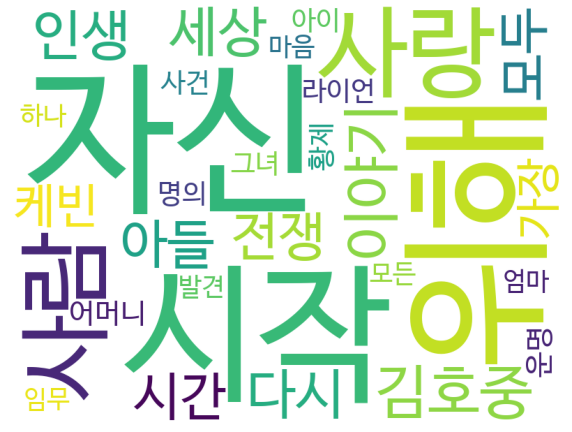

In [16]:
wordcloud = WordCloud(font_path = 'NanumBarunGothic', background_color = 'white', width = 800, height = 600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize = (10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()